<a href="https://colab.research.google.com/github/simoneminorr/Ds4002-Group14-Projects/blob/main/Trust_Pilot_Script_for_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trust Pilot Script

# Importing Data

In [1]:
#importing data and reading it in
import pandas as pd

allcompaniesdata = pd.read_csv("/content/shipping_trustpilot_latest_reviews(All Shipping Service Companies).csv", encoding="latin1")

allcompaniesdata.head()

,Shipping Company,Posted date,Star rating,Review text,Source
0,FedEx,"February 4, 2026",1,Low-level service. Not recommended to order or...,Trustpilot  FedEx (www.fedex.com)
1,FedEx,"February 3, 2026",1,I contacted FedEx Denmark to request an export...,Trustpilot  FedEx (www.fedex.com)
2,FedEx,"February 4, 2026",1,Absolutely garbage service. Package has had st...,Trustpilot  FedEx (www.fedex.com)
3,FedEx,"January 30, 2026",1,This is the complete worst company ever first ...,Trustpilot  FedEx (www.fedex.com)
4,FedEx,"February 3, 2026",1,The worst shipping and customer lack of service.,Trustpilot  FedEx (www.fedex.com)


# Inspecting & Cleaning Data

In [2]:
#inspect and describe data
print(allcompaniesdata.info())
print("\n")
print(allcompaniesdata.describe(include='all'))
print("\nMissing Values:\n")
print(allcompaniesdata.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Shipping Company  120 non-null    object
 1   Posted date       120 non-null    object
 2   Star rating       120 non-null    int64 
 3   Review text       120 non-null    object
 4   Source            119 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.8+ KB
None


       Shipping Company Posted date  Star rating  \
count               120         120   120.000000   
unique                4          29          NaN   
top               FedEx    6-Feb-26          NaN   
freq                 30          23          NaN   
mean                NaN         NaN     1.158333   
std                 NaN         NaN     0.744682   
min                 NaN         NaN     1.000000   
25%                 NaN         NaN     1.000000   
50%                 NaN         NaN     1.000000 

In [3]:
#then clean it (minimal cleaning necessary though because everything was manually inputted)
# Make a copy of the original df to preserve the initial df in case we mess up

original_allcompaniesdata = pd.read_csv("/content/shipping_trustpilot_latest_reviews(All Shipping Service Companies).csv", encoding="latin1")
allcompaniesdata = original_allcompaniesdata.copy()

#noticed that some dates are in month day, year format and others are in DD-MM-YYYY format
# -> convert 'Posted date' to datetime with two different formats
#  starting with the 'Month Day, Year' format
dates_parsed = pd.to_datetime(allcompaniesdata['Posted date'], format='%B %d, %Y', errors='coerce')

# then for the dates that failed the first time (are NaT), try to coerce to 'Day-Mon-YY' format
mask_failed_first_attempt = dates_parsed.isna()
dates_parsed[mask_failed_first_attempt] = pd.to_datetime(
    allcompaniesdata['Posted date'][mask_failed_first_attempt],
    format='%d-%b-%y',
    errors='coerce'
)

# assigning the combined parsed dates back to the DataFrame
allcompaniesdata['Posted date'] = dates_parsed

# not really important but for citation purposes filling the missing 'Source' values
allcompaniesdata['Source'] = allcompaniesdata['Source'].fillna('Unknown')

# For some reason one of the dates couldn't be coerced soooo removed row where 'Posted date' was NaT
allcompaniesdata.dropna(subset=['Posted date'], inplace=True)

#no duplicates because manually inserted and all numbers like star rating and reading as the correct data type

# finally displaying the information of the cleaned DataFrame
print(allcompaniesdata.info())
print("\n")

# looking at the first 5 rows of the cleaned DataFrame
print(allcompaniesdata.head())

<class 'pandas.core.frame.DataFrame'>
Index: 119 entries, 0 to 119
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Shipping Company  119 non-null    object        
 1   Posted date       119 non-null    datetime64[ns]
 2   Star rating       119 non-null    int64         
 3   Review text       119 non-null    object        
 4   Source            119 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 5.6+ KB
None


  Shipping Company Posted date  Star rating  \
0            FedEx  2026-02-04            1   
1            FedEx  2026-02-03            1   
2            FedEx  2026-02-04            1   
3            FedEx  2026-01-30            1   
4            FedEx  2026-02-03            1   

                                         Review text  \
0  Low-level service. Not recommended to order or...   
1  I contacted FedEx Denmark to request an export...

# Exploratory Data Analysis

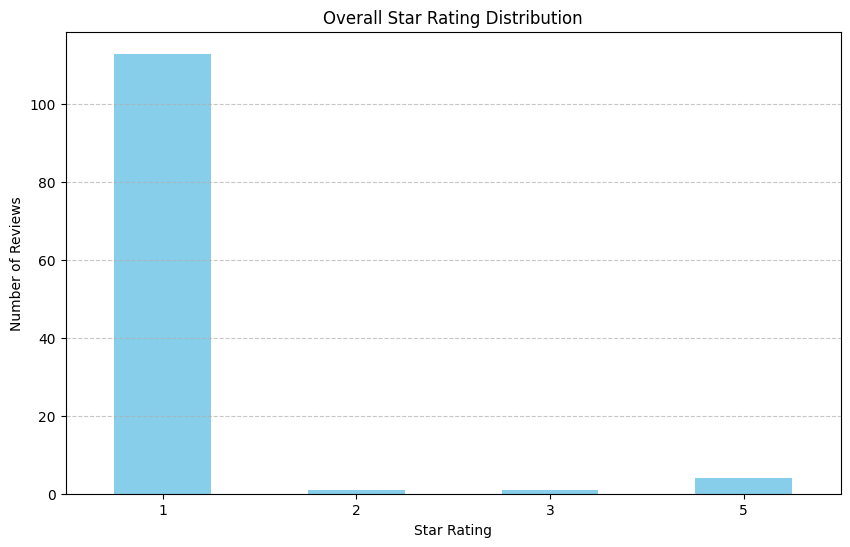

In [4]:
#getting sense of rating by score before looking at words to see how the energy is leaning

import matplotlib.pyplot as plt

# calculating the frequency for each unique 'Star rating' across all companies
star_rating_distribution = allcompaniesdata['Star rating'].value_counts().sort_index()

# creating a bar chart to visualize this distribution from above
plt.figure(figsize=(10, 6))
star_rating_distribution.plot(kind='bar', color='skyblue')
plt.title('Overall Star Rating Distribution')
plt.xlabel('Star Rating')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

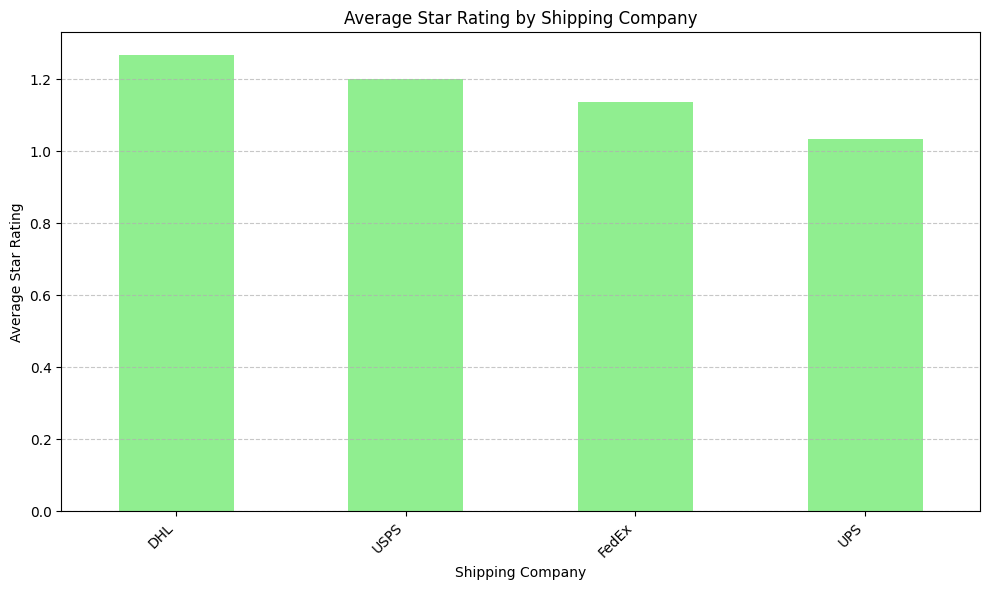

In [5]:
#calculating the average 'Star rating' for each shipping company
avg_star_rating_by_company = allcompaniesdata.groupby('Shipping Company')['Star rating'].mean().sort_values(ascending=False)

# bar chart to visualize these average star ratings from above
plt.figure(figsize=(10, 6))
avg_star_rating_by_company.plot(kind='bar', color='lightgreen')
plt.title('Average Star Rating by Shipping Company')
plt.xlabel('Shipping Company')
plt.ylabel('Average Star Rating')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

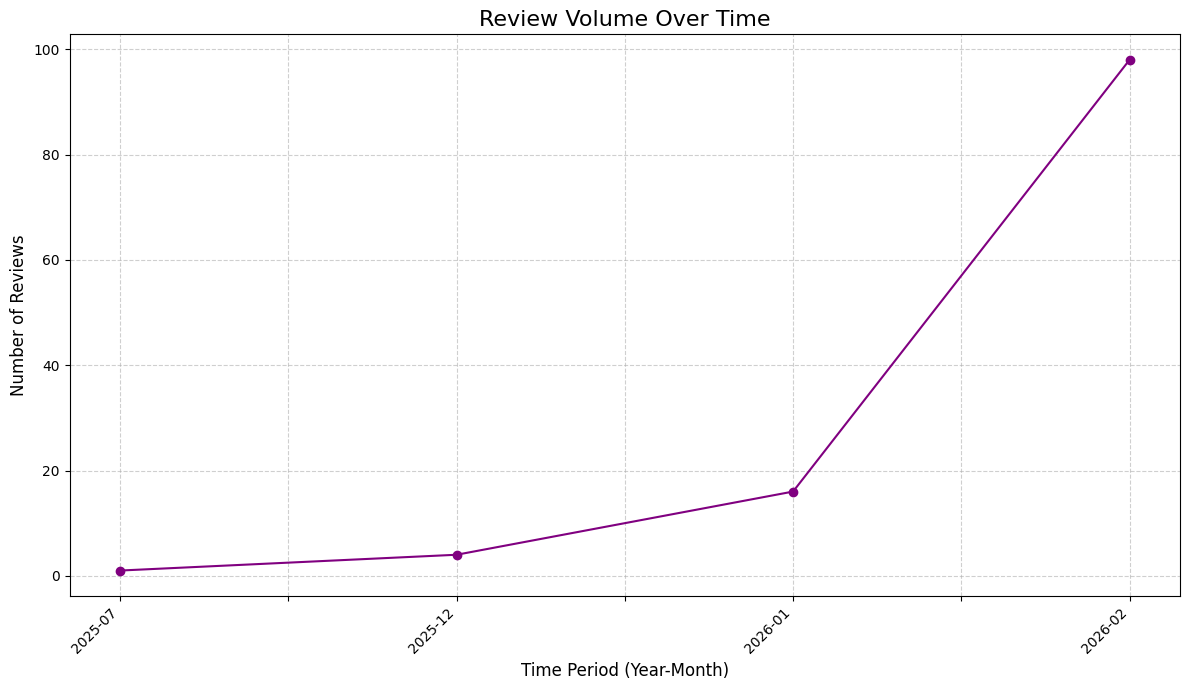

In [6]:
#analyzing review volume over time (we anticipate it to be skewed the the left because we show the first 30 comments that populated but that means they will be more recent)
# extracting the year and month from the 'Posted date' column
allcompaniesdata['YearMonth'] = allcompaniesdata['Posted date'].dt.to_period('M')

# grouping allcompaniesdata DataFrame by 'YearMonth' and count the number of reviews
review_volume_over_time = allcompaniesdata.groupby('YearMonth').size()

# converting 'YearMonth' to string for plotting to avoid potential datetime index issues if not handled explicitly by plot function
review_volume_over_time.index = review_volume_over_time.index.astype(str)

# creating a line chart to visualize the review counts over time.
plt.figure(figsize=(12, 7))
review_volume_over_time.plot(kind='line', marker='o', color='purple')

# adding title and labels and to the chart
plt.title('Review Volume Over Time', fontsize=16)
plt.xlabel('Time Period (Year-Month)', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)

# adding grid and rotating x-axis labels for better readability
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45, ha='right')

# plot display
plt.tight_layout()
plt.show()

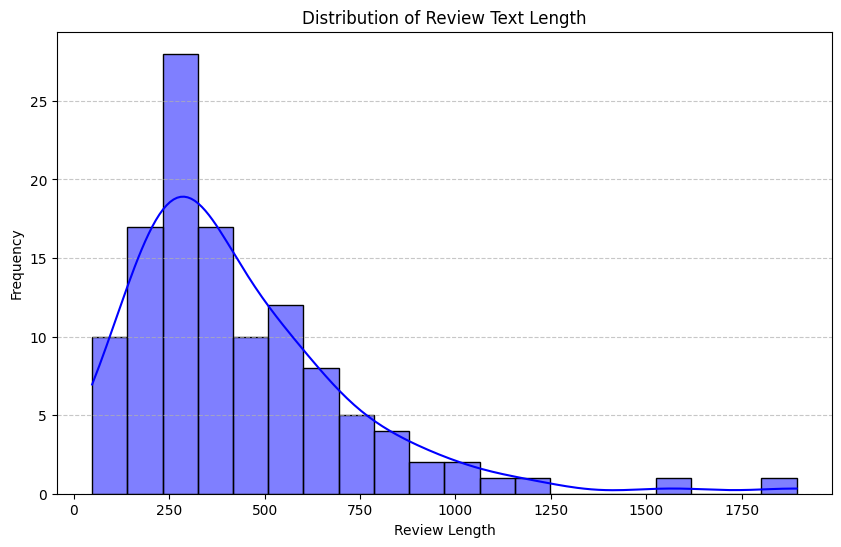

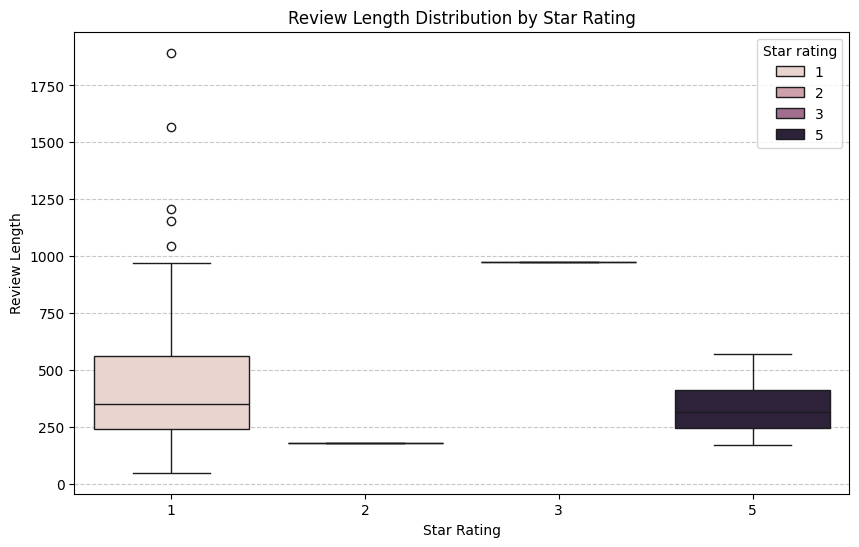

In [8]:
import seaborn as sns

#analyzing review text length so we can get a general sense of review length and eventually relate it to sentiment
# creating'Review Length' column
allcompaniesdata['Review Length'] = allcompaniesdata['Review text'].apply(len)

# making histogram for 'Review Length'
plt.figure(figsize=(10, 6))
sns.histplot(allcompaniesdata['Review Length'], bins=20, kde=True, color='blue')
plt.title('Distribution of Review Text Length')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# creating box plot to compare 'Review Length' across 'Star rating' categories
plt.figure(figsize=(10, 6))
sns.boxplot(x='Star rating', y='Review Length', data=allcompaniesdata, hue='Star rating')
plt.title('Review Length Distribution by Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Review Length')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Preparing for Sentiment Analysis

In [9]:
#installing Vader package in python for sentiment analysis
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.9 MB/s eta 0:00:00


In [10]:
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# double checking to ensure 'Review text' column exists and handle potential NaNs
allcompaniesdata['Review text'] = allcompaniesdata['Review text'].fillna('')

# the text cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text) # Remove URLs
    text = re.sub(r'\n+', ' ', text)   # Replace newlines with spaces
    text = re.sub(r'[^a-z0-9\s]', '', text) # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip() # Collapse multiple spaces
    return text

allcompaniesdata['cleaned_review_text'] = allcompaniesdata['Review text'].apply(clean_text)

# initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# the function to get VADER sentiment scores
def get_vader_sentiment(text):
    return analyzer.polarity_scores(text)

# applying sentiment analysis
allcompaniesdata[['neg', 'neu', 'pos', 'compound']] = allcompaniesdata['cleaned_review_text'].apply(get_vader_sentiment).apply(pd.Series)

# creating sentiment label based on compound score
def label_sentiment(compound_score):
    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

allcompaniesdata['sentiment_label'] = allcompaniesdata['compound'].apply(label_sentiment)

# displaying df with new sentiment columns
print(allcompaniesdata[['Review text', 'cleaned_review_text', 'neg', 'neu', 'pos', 'compound', 'sentiment_label']].head())


                                         Review text  \
0  Low-level service. Not recommended to order or...   
1  I contacted FedEx Denmark to request an export...   
2  Absolutely garbage service. Package has had st...   
3  This is the complete worst company ever first ...   
4   The worst shipping and customer lack of service.   

                                 cleaned_review_text    neg    neu    pos  \
0  lowlevel service not recommended to order or l...  0.076  0.810  0.114   
1  i contacted fedex denmark to request an export...  0.119  0.881  0.000   
2  absolutely garbage service package has had sta...  0.058  0.901  0.041   
3  this is the complete worst company ever first ...  0.122  0.760  0.118   
4    the worst shipping and customer lack of service  0.516  0.484  0.000   

   compound sentiment_label  
0    0.7176        positive  
1   -0.8126        negative  
2   -0.4019        negative  
3   -0.4137        negative  
4   -0.7506        negative  


# Visualizing the Sentiment

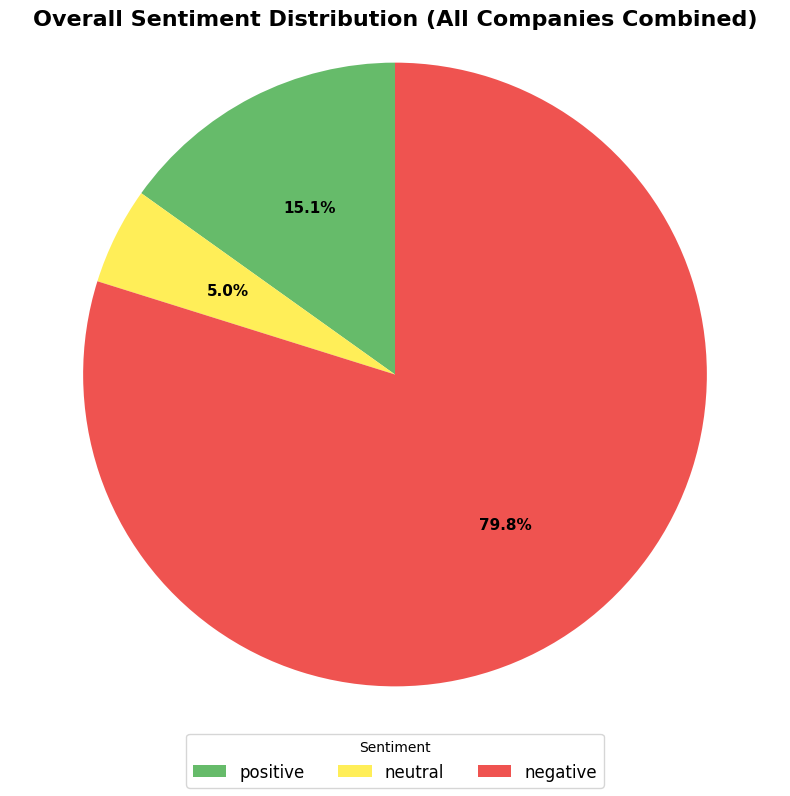

In [11]:
#making pie chart of distrubtion of sentiment for all companies

# Sentiment order (keeping colors consistent with positive being green, neutral yellow, and red negative because it is intuitive)
sentiment_order = ["positive", "neutral", "negative"]
colors = {"positive": "#66bb6a", "neutral": "#ffee58", "negative": "#ef5350"} # Green, Yellow, Red

# calculating overall sentiment distribution
overall_sentiment_counts = (
    allcompaniesdata["sentiment_label"]
    .value_counts(normalize=True)
    .reindex(sentiment_order, fill_value=0)
    * 100
)

# matching sentiment labels to colors
pie_colors = [colors[label] for label in overall_sentiment_counts.index]

# creating one singular pie chart for overall sentiment
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    overall_sentiment_counts,
    autopct="%1.1f%%",
    startangle=90,
    colors=pie_colors
)

ax.set_title("Overall Sentiment Distribution (All Companies Combined)", fontsize=16, fontweight="bold")
ax.axis("equal") # Equal aspect ratio ensures that pie is drawn as a circle.

# bolding and enlargering text for viewing
for autotext in autotexts:
    autotext.set_fontsize(11)
    autotext.set_fontweight("bold")

# legend creation
fig.legend(
    wedges,
    sentiment_order,
    loc="lower center",
    ncol=3,
    fontsize=12,
    title="Sentiment"
)

plt.tight_layout(rect=[0, 0.08, 1, 1]) # Adjust layout to prevent overlap
plt.show()

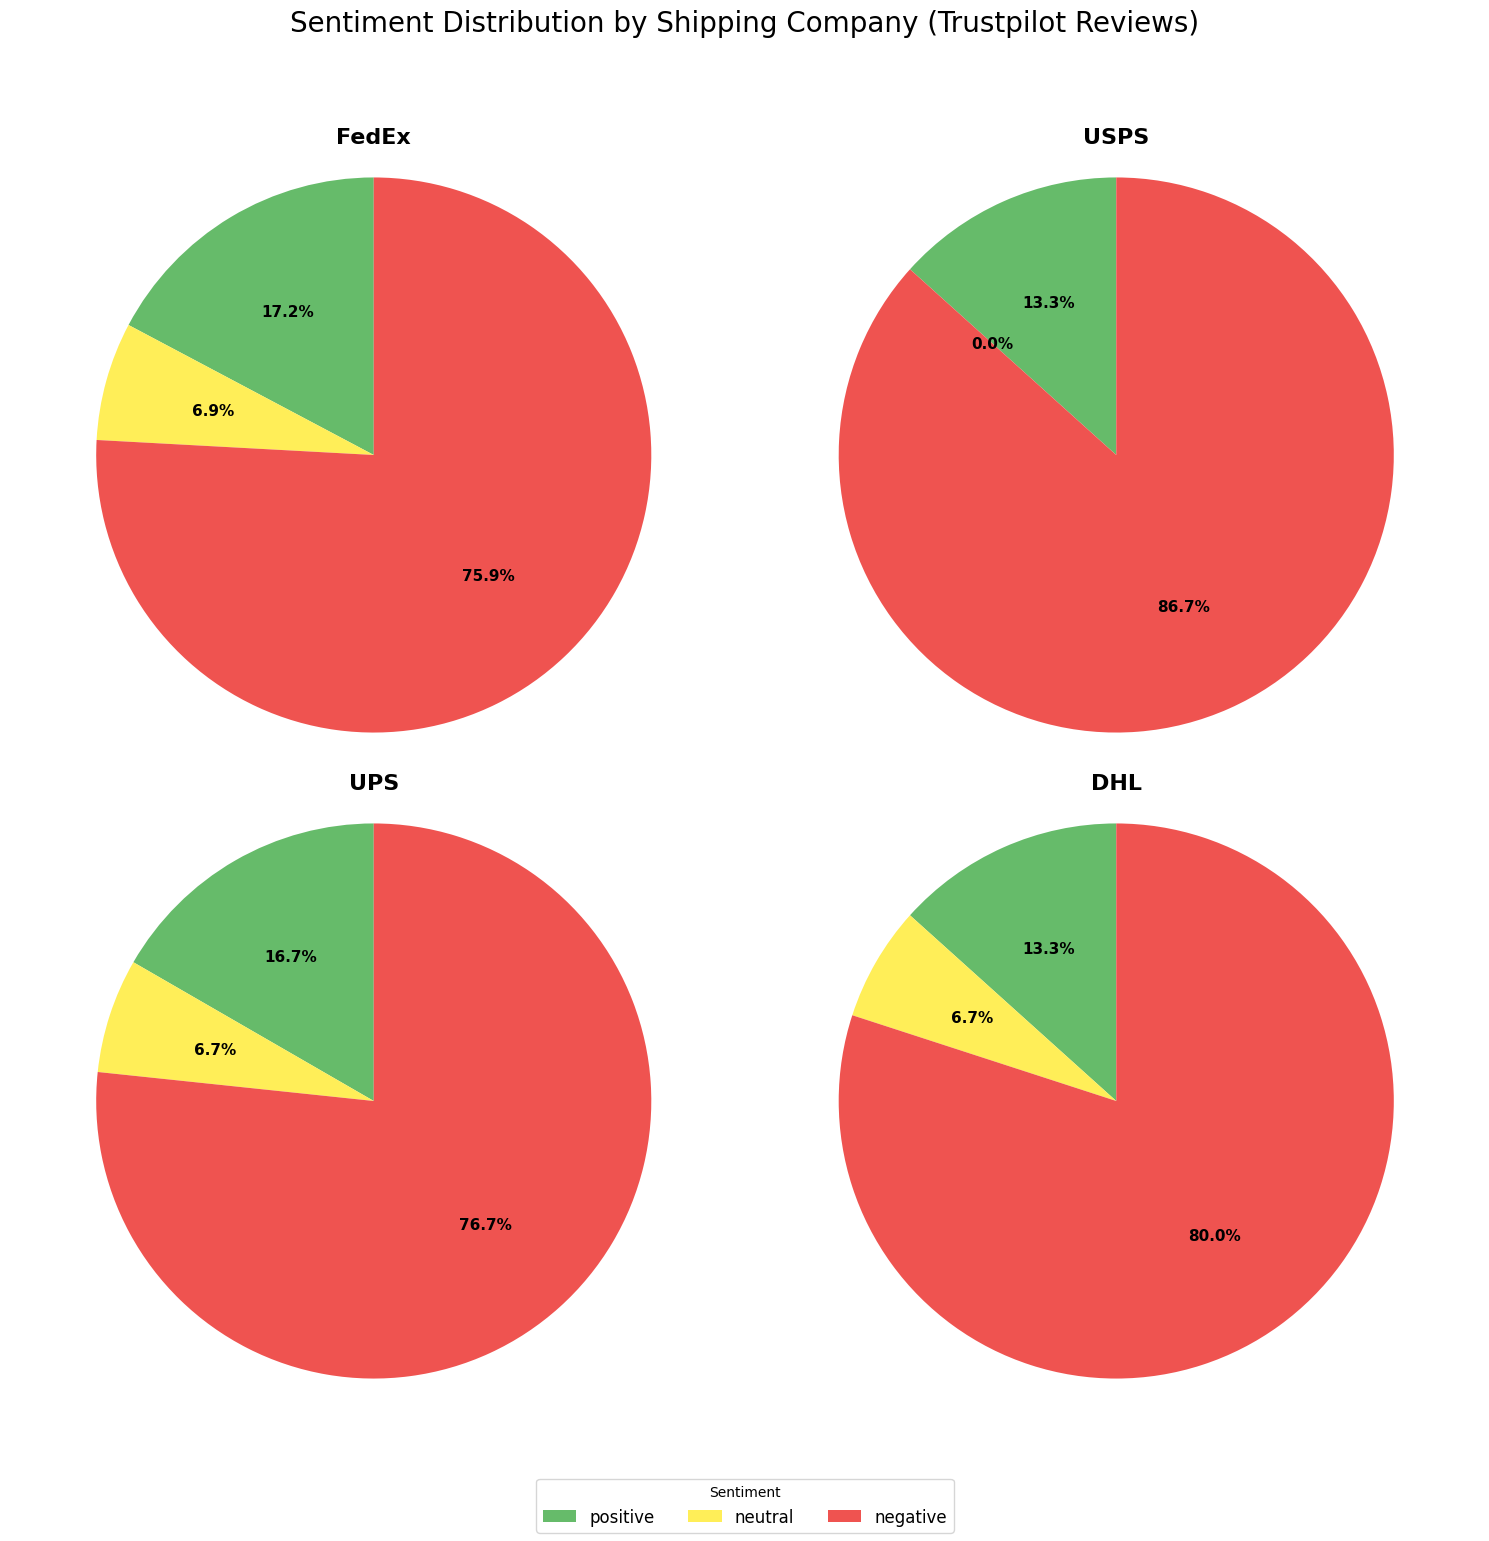

In [12]:
#sentiment distrubtion by shipping company (trust pilot reviews)
companies = allcompaniesdata["Shipping Company"].unique()

# Sentiment order (keeping colors consistent with positive being green, neutral yellow, and red negative because it is intuitive)
sentiment_order = ["positive", "neutral", "negative"]
colors = {"positive": "#66bb6a", "neutral": "#ffee58", "negative": "#ef5350"} # Green, Yellow, Red

# creating 2x2 grid for companies so the pie charts can be in a square formation
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
axes = axes.flatten()

for ax, company in zip(axes, companies):
    company_df = allcompaniesdata[allcompaniesdata["Shipping Company"] == company]

    sentiment_counts = (
        company_df["sentiment_label"]
        .value_counts(normalize=True)
        .reindex(sentiment_order, fill_value=0)
        * 100
    )

    # matching sentiment labels to colors
    pie_colors = [colors[label] for label in sentiment_counts.index]

    # pie chart with labels and percentages
    wedges, texts, autotexts = ax.pie(
        sentiment_counts,
        autopct="%1.1f%%",
        startangle=90,
        colors=pie_colors
    )

    # making company title bigger for viewing
    ax.set_title(company, fontsize=16, fontweight="bold")
    ax.axis("equal") # Equal aspect ratio ensures that pie is drawn as a circle.

    # bolding and englarging text for visibility
    for autotext in autotexts:
        autotext.set_fontsize(11)
        autotext.set_fontweight("bold")

# creating legend
fig.legend(
    wedges,
    sentiment_order,
    loc="lower center",
    ncol=3,
    fontsize=12,
    title="Sentiment"
)

plt.suptitle("Sentiment Distribution by Shipping Company (Trustpilot Reviews)", fontsize=20, y=1.02)
plt.tight_layout(rect=[0, 0.08, 1, 0.98]) # Adjust layout to prevent overlap
plt.show()

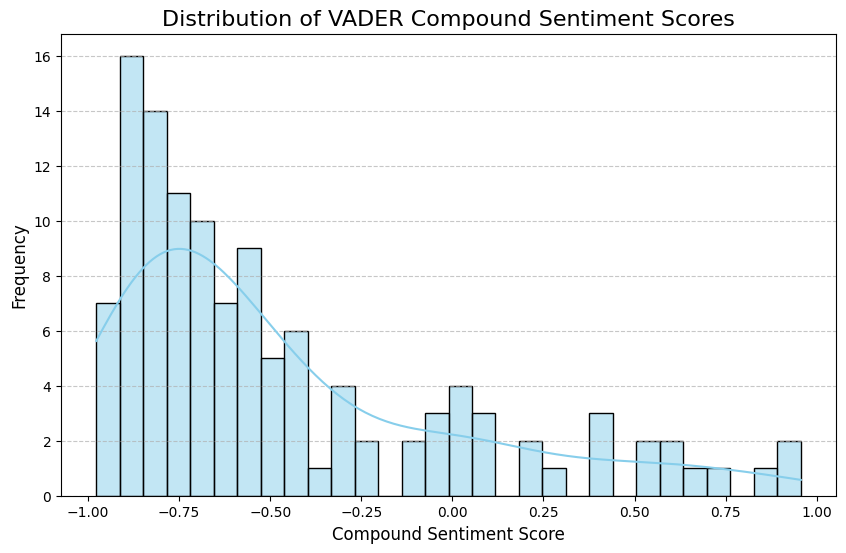

In [13]:
# histogram of VADER compound scores

# creating histogram of the 'compound' column
plt.figure(figsize=(10, 6))
sns.histplot(allcompaniesdata['compound'], bins=30, kde=True, color='skyblue')

# adding title and labels
plt.title('Distribution of VADER Compound Sentiment Scores', fontsize=16)
plt.xlabel('Compound Sentiment Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# grid creation for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# plot display
plt.show()

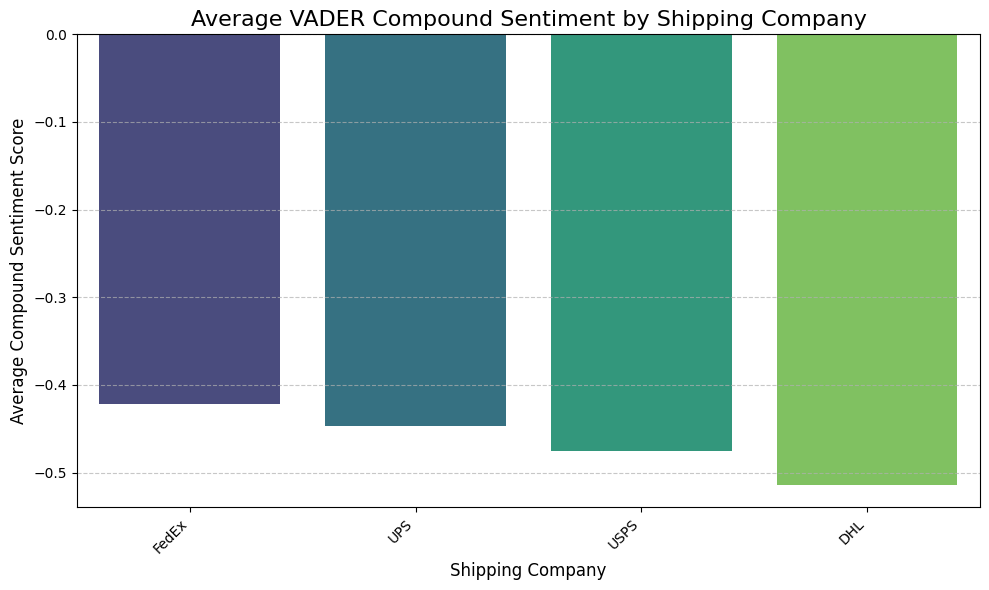

In [14]:
#bar chart of average compount sentiment by company

# calculating average 'compound' sentiment score for each 'Shipping Company'
avg_compound_sentiment_by_company = allcompaniesdata.groupby('Shipping Company')['compound'].mean().sort_values(ascending=False)

# making bar chart to visualize these average sentiment scores
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_compound_sentiment_by_company.index, y=avg_compound_sentiment_by_company.values, hue=avg_compound_sentiment_by_company.index, palette='viridis', legend=False)

# title and labels
plt.title('Average VADER Compound Sentiment by Shipping Company', fontsize=16)
plt.xlabel('Shipping Company', fontsize=12)
plt.ylabel('Average Compound Sentiment Score', fontsize=12)

# rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# plot display
plt.tight_layout()
plt.show()

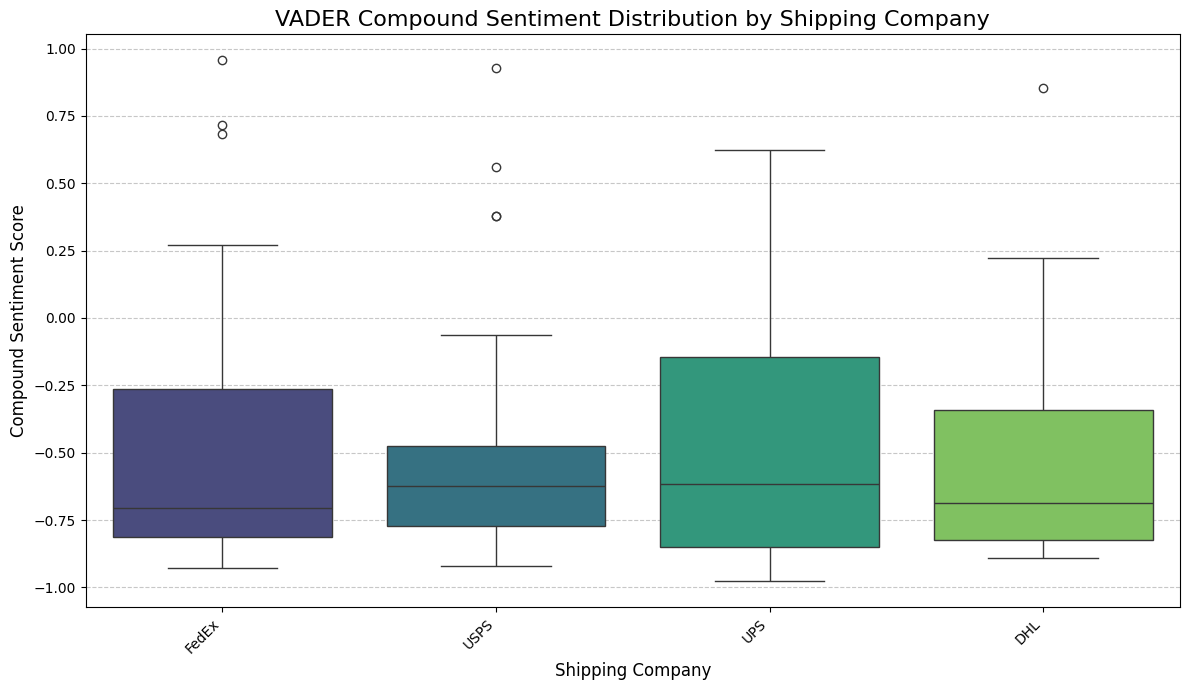

In [15]:
#box plot of sentiment distrubtion by company

# making box plot to visualize the distribution of VADER compound sentiment scores for each company
plt.figure(figsize=(12, 7))
sns.boxplot(x='Shipping Company', y='compound', data=allcompaniesdata, hue='Shipping Company', palette='viridis', legend=False)

# title and labels
plt.title('VADER Compound Sentiment Distribution by Shipping Company', fontsize=16)
plt.xlabel('Shipping Company', fontsize=12)
plt.ylabel('Compound Sentiment Score', fontsize=12)

# rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# plot display
plt.tight_layout()
plt.show()

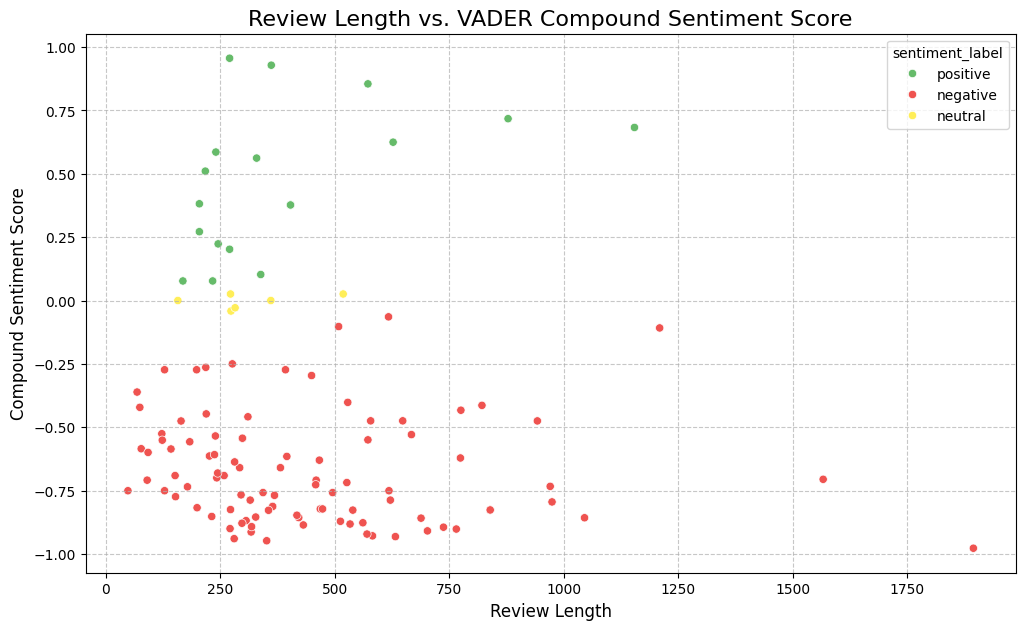

In [16]:
#scatter plot of review length by sentiment

# creating scatter plot to explore the relationship between review length and compound sentiment scores
plt.figure(figsize=(12, 7))
sns.scatterplot(x='Review Length', y='compound', data=allcompaniesdata, hue='sentiment_label', palette={'positive': '#66bb6a', 'neutral': '#ffee58', 'negative': '#ef5350'})

# making title and labels
plt.title('Review Length vs. VADER Compound Sentiment Score', fontsize=16)
plt.xlabel('Review Length', fontsize=12)
plt.ylabel('Compound Sentiment Score', fontsize=12)

# putting in grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# plot display
plt.show()

Normalized Sentiment Distribution by Shipping Company (Percentages):

sentiment_label    negative   neutral   positive
Shipping Company                                
DHL               80.000000  6.666667  13.333333
FedEx             75.862069  6.896552  17.241379
UPS               76.666667  6.666667  16.666667
USPS              86.666667  0.000000  13.333333


<Figure size 1200x700 with 0 Axes>

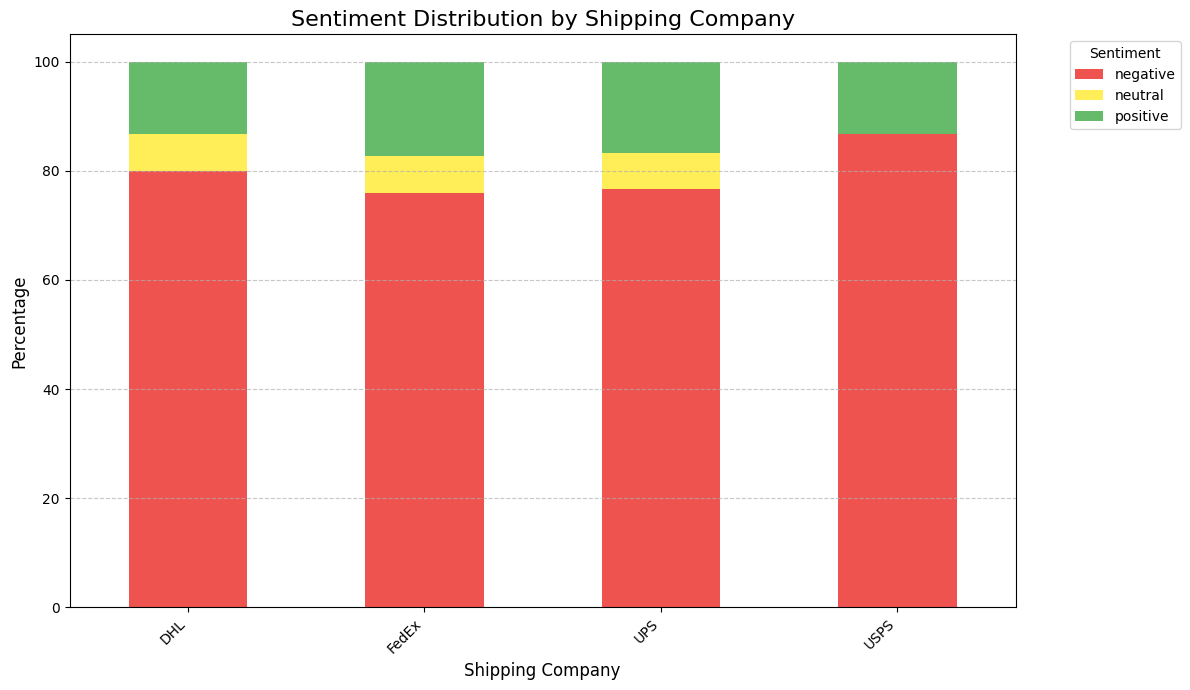

In [17]:
#stacked bar chart and crosstab table of sentiment labels by company

# make crosstabulation table
crosstab_sentiment = pd.crosstab(allcompaniesdata['Shipping Company'], allcompaniesdata['sentiment_label'])

# making sure all sentiment labels are present, even if some companies don't have them
# reindexing for consistent order for plotting
sentiment_order = ['negative', 'neutral', 'positive']
for s in sentiment_order:
    if s not in crosstab_sentiment.columns:
        crosstab_sentiment[s] = 0
crosstab_sentiment = crosstab_sentiment[sentiment_order]

# normalizing the crosstabulation table to display percentages
normalized_crosstab_sentiment = crosstab_sentiment.div(crosstab_sentiment.sum(axis=1), axis=0) * 100

# display the normalized crosstabulation table
print("Normalized Sentiment Distribution by Shipping Company (Percentages):\n")
print(normalized_crosstab_sentiment)

# creating a stacked bar chart
plt.figure(figsize=(12, 7))
normalized_crosstab_sentiment.plot(kind='bar', stacked=True, figsize=(12, 7), color={'positive': '#66bb6a', 'neutral': '#ffee58', 'negative': '#ef5350'})

# title of the chart and x- y- axis labels
plt.title('Sentiment Distribution by Shipping Company', fontsize=16)
plt.xlabel('Shipping Company', fontsize=12)
plt.ylabel('Percentage', fontsize=12)

# rotating x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# legend creation for chart
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')

# adding grid for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# plot display
plt.tight_layout()
plt.show()

# Hypothesis Testing

Hypothesis 1 Testing
(hypothesis was that all shipping companies would exceed 50% negative sentiment)

In [18]:
#hypothesis 1 testing
print("Negative Sentiment Percentage for Each Shipping Company:")
for company, row in normalized_crosstab_sentiment.iterrows():
    negative_percentage = row['negative']
    exceeds_50_percent = "Yes" if negative_percentage > 50 else "No"
    print(f"- {company}: {negative_percentage:.2f}% Negative Sentiment (Exceeds 50%: {exceeds_50_percent})")

Negative Sentiment Percentage for Each Shipping Company:
- DHL: 80.00% Negative Sentiment (Exceeds 50%: Yes)
- FedEx: 75.86% Negative Sentiment (Exceeds 50%: Yes)
- UPS: 76.67% Negative Sentiment (Exceeds 50%: Yes)
- USPS: 86.67% Negative Sentiment (Exceeds 50%: Yes)


Hypothesis 2 Testing
(hypothesis was that public (USPS) company would do better than private (UPS, FedEx, DHL))

In [19]:
#hypothesis 2 testing
company_type_mapping = {
    'UPS': 'Private',
    'FedEx': 'Private',
    'DHL': 'Private',
    'USPS': 'Public'
}

allcompaniesdata['Company_Type'] = allcompaniesdata['Shipping Company'].map(company_type_mapping)

print(allcompaniesdata.head())

  Shipping Company Posted date  Star rating  \
0            FedEx  2026-02-04            1   
1            FedEx  2026-02-03            1   
2            FedEx  2026-02-04            1   
3            FedEx  2026-01-30            1   
4            FedEx  2026-02-03            1   

                                         Review text  \
0  Low-level service. Not recommended to order or...   
1  I contacted FedEx Denmark to request an export...   
2  Absolutely garbage service. Package has had st...   
3  This is the complete worst company ever first ...   
4   The worst shipping and customer lack of service.   

                               Source YearMonth  Review Length  \
0  Trustpilot  FedEx (www.fedex.com)   2026-02            878   
1  Trustpilot  FedEx (www.fedex.com)   2026-02            364   
2  Trustpilot  FedEx (www.fedex.com)   2026-02            528   
3  Trustpilot  FedEx (www.fedex.com)   2026-01            821   
4  Trustpilot  FedEx (www.fedex.com)   2026-02   

In [20]:
from scipy.stats import f_oneway

# Separate compound sentiment scores by Company_Type
private_sentiment = allcompaniesdata[allcompaniesdata['Company_Type'] == 'Private']['compound']
public_sentiment = allcompaniesdata[allcompaniesdata['Company_Type'] == 'Public']['compound']

# Perform ANOVA test
f_statistic, p_value = f_oneway(private_sentiment, public_sentiment)

print(f"ANOVA F-statistic: {f_statistic:.3f}")
print(f"ANOVA P-value: {p_value:.3f}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nConclusion: There is a statistically significant difference in mean compound sentiment scores between Private and Public shipping companies.")
else:
    print("\nConclusion: There is no statistically significant difference in mean compound sentiment scores between Private and Public shipping companies.")

ANOVA F-statistic: 0.017
ANOVA P-value: 0.895

Conclusion: There is no statistically significant difference in mean compound sentiment scores between Private and Public shipping companies.
